# 3.1 - Métricas de avaliação de modelos: Accuracy, Precision, Recall, F1, AUC, Gini, K-S, R2, MAE, RMSE

## 3.1.1 - Introdução:

Ao usar determinado modelo em Machine Learning, usamos as métricas de avaliação para saber se aquele modelo obteve os resultados esperados. Podemos utilizar mais de uma métrica para garantir que não ocorra nenhum problema de predição do modelo. Mas não podemos escolher qualquer tipo de métrica, pois cada uma delas se encaixa melhor em determinado modelo e situação. E o uso de uma métrica apropriada em um problema, é fundamental para o sucesso em um modelo de Machine Learning.

### Métricas para modelos de classificação:
São as métricas usadas na classificação de problemas, ou seja, decidimos em qual categoria os dados de uma amostra são definidos, por exemplo ao decidir se um email é spam ou não. As classificações binárias são muito usadas, desse modo escolhemos em qual das duas categorias possíveis (0 e 1), que os dados pertencem.

### Matriz de Confusão:
Também chamada de matriz de erro, é uma forma bem simples e comum de entender e visualizar a performance de um modelo de classificação. Ela consiste por uma matriz de duas linhas e duas colunas, onde as colunas indicam os valores preditos e as linhas indicam os valores reais. Cada quadrante indica uma combinação específica dos exemplos de um grupo. A matriz permite identificar quantos exemplos foram classificados corretamente e erroneamente. Abaixo estão definidos os respectivos quadrantes:

* **Verdadeiro Positivo (TP - True Positive):** valores positivos que o modelo conseguiu classificar corretamente;
* **Falso Positivo (FP - False Positive):** valores negativos que o modelo previu como valores positivos;
* **Falso Negativo (FN - False Negative):** valores positivos que o modelo previu como valores negativos;
* **Verdadeiro Negativo (TN - True Negative):** valores negativos que o modelo conseguiu classificar corretamente.
<img src="https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png" width=500px></img>

## 3.1.2 - Acurácia (Accuracy):

É a métrica mais simples, pois ela representa todos os valores que foram classificados corretamente, independente se a classe for positiva ou negativa. Por conta disso, ela não é muito usada quando os dados não estão balanceados. Apesar de ser uma métrica bem simples e de fácil uso, a sua principal desvantagem é no uso de dados desbalanceados, pois ela passa uma falsa impressão de um bom desempenho. É definida pela fórmula abaixo:
* $$\frac{TP + TN}{TP + TN + FP + FN}$$

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

url = 'https://raw.githubusercontent.com/scudilio/classification_metrics/master/dataset_Social_Network_Ads.csv'
data = pd.read_csv(url)

y = data['Purchased']
X = data.iloc[ :, [2,3]].values

x_treino, x_teste, y_treino, y_teste  = train_test_split(X, y, test_size = 0.25, random_state = 1)
knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)
resultado_knn = knn.predict(x_teste)

acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)

Acurácia: 0.740000


## 3.1.3 - Precisão (Precision):

Outra métrica simples que é muito usada. É definida pela razão entre a quantidade de valores classificados corretamente positivos, pelo total de valores classificados como positivos. É definida pela fórmula abaixo:
* $$\frac{TP}{TP + FP}$$

## 3.1.4 - Recall:

Esta métrica é o inverso da métrica Precision, pois ela considera dá uma maior ênfase para os erros falsos, enquanto a Precision dá maior ênfase aos erros positivos. É definida pela razão entre a quantidade de valores classificados corretamente positivos, pelos valores que foram classificados corretamente, tanto os positivos quanto os negativos. É definida pela fórmula abaixo:
* $$\frac{TP}{TP + FN}$$

## 3.1.5 - F1 Score:

É a métrica definida pela média harmônica entre a Precision e a Recall. Desta maneira esta métrica é boa quando temos um conjunto de dados com classes desbalanceados, e o modelo não emite probabilidades. Se a Precision ou o Recall forem zero ou um valor próximo disso, o F1 - Score também será baixo. Em contra partida, se as duas métricas forem um valor alto, o F1 também será alto. É definido pela fórmula abaixo:
* $$F_{1} = 2 * \frac{Precision * Recall}{Precision + Recall}$$

In [3]:
import warnings
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pd.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)

precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


## 3.1.6 - AUC (Area Under the Curve):

Para entendermos o que é AUC, antes precisamos entender outros conceitos:
* **Sensibilidade ou Recall (TPR):** Definida pela seguinte fórmula:
 $\frac{TP}{TP + FN}$

* **Especifidade (FPR):** Definida pela seguinte fórmula:
 $\frac{FP}{FP + TN}$
 

* **Curva ROC (Receiver Operating Characteristic):** É muito utilizada para avaliar a performance de um classificador para diferentes liminares de classificação. É definida pela relação entre TPR e FPR. Uma vantagem da curva ROC, é a possibilidade de escolher o ponto de corte que otimiza o desempenho do modelo.

Com esses conceitos definidos, podemos entender o que é AUC:
* **AUC (Area Under the Curve) ou AUROC (Area Under the ROC curve):** É a área sob a curva ROC, que pode ser utilizada como uma métrica de qualidade de um modelo, pois quanto mais próxima a curva estiver do canto superior esquerdo, maior será o AUC e melhor será o modelo. Esta métrica não é sensível aos dados desbalanceados, desta forma ela se comporta melhor com estes tipos de dados, assim sendo mais eficiente que a acúracia.

AUC - Test Set: 82.85%


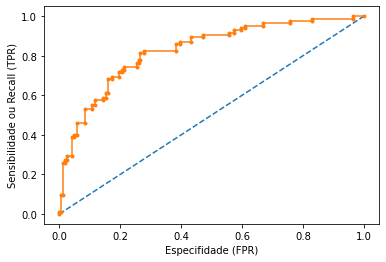

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('Especifidade (FPR)')
plt.ylabel('Sensibilidade ou Recall (TPR)')
# show the plot
plt.show()

## 3.1.7 - Gini:

Também chamada de coeficiente Gini ou índice Gini, é uma métrica usada quando temos dados não balanceados. O valor do coeficiente varia de 0 a 1, onde 0 representa uma igualdade perfeita e 1 representa uma desigualdade perfeita. Se o valor do índice for alto, os dados serão mais dispersos. Essa métrica pode ser calculada através da AUC. É definida pela fórmula abaixo:
* $$Gini = (2 * AUC) - 1$$

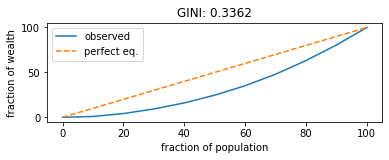

In [9]:
import numpy as np

def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = np.random.rand(500)
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()

## 3.1.8 - K-S (Kolmogorov-Smirnov):

Esta métrica mede a performance dos modelos de classificação. É definido pelo grau de separação entre as distribuições positivas e negativas. O valor de K-S varia de 0 a 100, onde 100 indica que ocorreu uma separação do grupo de dados em duas partes, onde um grupo contém todos os positivos e o outro os negativos. E se o K-S não conseguir diferenciar os valores postivos dos negativos, ele escolhe casos randomicamente da população. A estatística de K–S para uma certa f.d.a F(x) é definida pela fórmula abaixo:
* $$D_{n} = sup_{x}[|F(x) - S(x)|]$$

A imagem abaixo mostra o K-S sobre uma classificação de homens e mulheres:

<img src="https://i.stack.imgur.com/eN3mW.png" width=500px></img>

### Métricas para modelos de regressão:
São métricas usadas em modelos de regressão, ou seja, em modelos onde nós conseguimos estimar a relação entre duas variáveis. Utilizando a regressão como ferramenta, conseguimos entender o presente para estimar o futuro.

## 3.1.9 - R² (R-Quadrado):

É uma métrica muito usada na área de finanças. Ela determina a porcentagem da variância que vai ser prevista pelo modelo, ou seja, ela diz o quão próximo as medidas reais estão do nosso modelo. Os valores variam de 0 a 1 e geralmente é transformado em porcentagem. É definida pela fórmula abaixo:
* $$R^{2} = 1 - \frac{Variancia Residual}{Variancia Total}$$

<img src="https://miro.medium.com/max/700/1*ovulJZVeDOHyTqlzSLnQAg.png"></img>

In [5]:
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime as dt

dt_inicio = '2021-01-01'
hoje = f'{dt.today().year}-{dt.today().month}-{dt.today().day}'
dt_final = hoje

ibov = web.DataReader('^BVSP', data_source='yahoo', start=dt_inicio, end=dt_final)
ibov = ibov.drop(columns=['Volume'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R2: ', r2)

R2:  0.5157379964034983


## 3.1.10 - MAE (Mean Absolute Error):

Esta métrica é definida como o erro absoluto médio, ou seja, consiste na média das distâncias entre os valores reais e preditos. O valor mínimo é 0 e não apresenta um valor máximo. É uma métrica usada para modelos que devem prever muitos dados ou dados sazonais. Um uso interessante, é sobre as previsões de números de casos de uma doença. É definida pela fórmula abaixo:
* $$MAE = \frac{1}{n}\sum_{i=1}^{n}\left |\hat{y}_{i} - y_{i} \right |$$

In [6]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_pred)
print('MAE: ', MAE)

MAE:  0.2696995647488142


## 3.1.11 - RMSE (Root Mean Square Error):

Para entender esta métrica, devemos definir a métrica MSE (Mean Squared Error):

* **MSE (Mean Squared Error):** É definida como o erro quadrático médio, ou seja, consiste na média dos erros de previsões ao quadrado. Esta métrica usa a diferença entre o valor real e o valor predito pelo modelo e eleva ao quadrado, faz isso com os outros pontos, soma-os e divide-se pelo número de valores preditos. E quanto maior esse resultado, pior é o modelo que estamos trabalhando. É muito utilizada em problemas onde grandes erros não são tolerados, por exemplo, em exames médicos e projeções de preços no mercado financeiro.

* **RMSE (Root Mean Squared Error):** É definida como a raiz do erro quadrático médio, ou seja, é uma métrica que deseja otimizar a MSE, porém assim como a MSE, ela penaliza predições muito distantes da real. É definida pela fórmula abaixo:
* $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y}_{i} - y_{i})^{2}}$$

In [7]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test,y_pred,squared=False) 
print('RMSE: ', RMSE)

RMSE:  0.3300383636842959


## 3.1.12 - Conclusão:

Os erros médios absolutos e quadráticos conseguem ter um desempenho melhor quando se trata de tendências, e isso é muito interessante no mercado financeiro, pois ele se move em tendências, nesse caso poderiamos usar o MAE e o MSE para prever os preços de ativos dentro de tendências.

<img src="https://www.bussoladoinvestidor.com.br/wp-content/uploads/2013/04/tendencias_analise_tecnica.jpg"></img>